# **(1)** **PURPOSE OF THE ASSIGNMENT:**

The purpose of the assignment is to check compare Naive Gaussian and Logistic regression. 

Further, we will explore various neural network models and find ways to improve its performance. We will briefly touch on accuracy of these models.


**MNIST Database:**

MNIST from KERAS consist of 70000 pictures of various digits in 28 x 28 resolution.

We will divide the dataset into set of 60k for training and 10k for testing.



In [14]:
# Importing various libraries and functions.

import time
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization

In [2]:
# Loading the MNIST data base and segregating them as train and test variables.

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [34]:
print("Shape of the train image set:",train_images.shape)
print("Shape of the test image set:",test_images.shape)

Shape of the train image set: (60000, 28, 28)
Shape of the test image set: (10000, 28, 28)


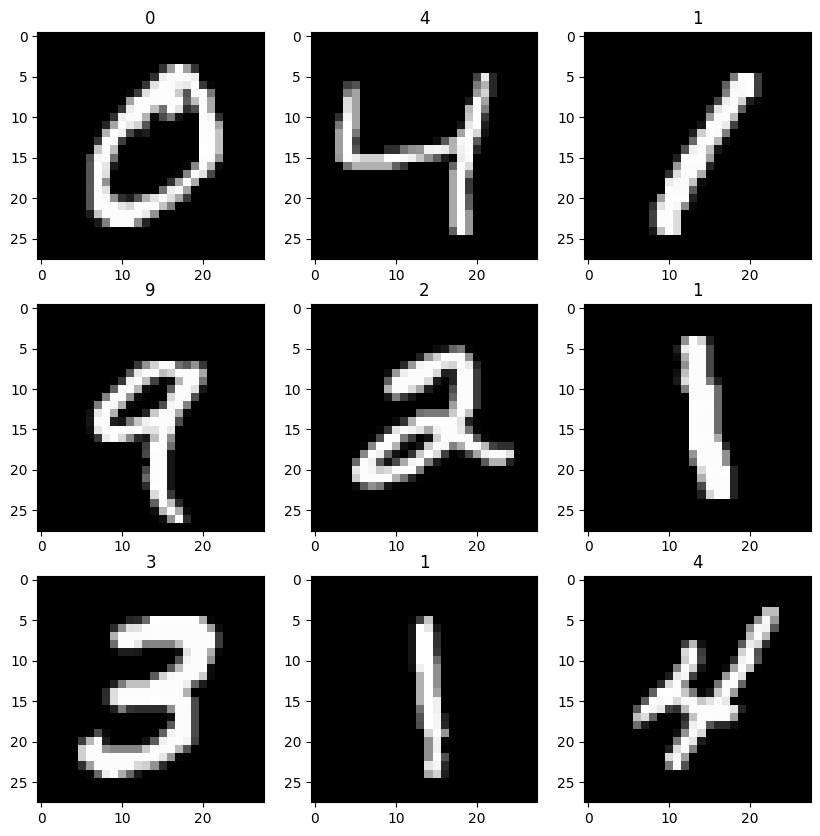

In [35]:
# Using basic plot to print 9 digits in 3 x 3 matrix.

figure = plt.gcf()
figure.set_size_inches(10, 10)
for i in range(1, 10):
  plt.subplot(3, 3, i)
  axis = plt.gca()
  axis.set_title(str(train_labels[i]))
  plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
plt.show()

In [3]:
# Reshaping the image for using it with Regression

train_images_f = train_images.reshape(-1, 28 * 28)
test_images_f = test_images.reshape(-1, 28 * 28)

In [4]:
# Normalizing the data

train_images_f = train_images_f / 255
test_images_f = test_images_f / 255

In [5]:
print(test_images_f.shape)
print(train_images_f.shape)

(10000, 784)
(60000, 784)


In [39]:
# printing the size of the labels

train_labels.shape

(60000,)

# **(2a) GAUSSIAN NAIVE BAYES MODEL:**

In [40]:
# Importing basic Gaussian, initializing the model and fitting it with train images and train labels

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(train_images_f, train_labels)


GaussianNB()

In [41]:
# Predicting using model with test_images 

y_model = model.predict(test_images_f)

In [42]:
# Comparing the accuracy of the test labels and predicted values from the model.

accuracy_score(test_labels, y_model)

0.5558

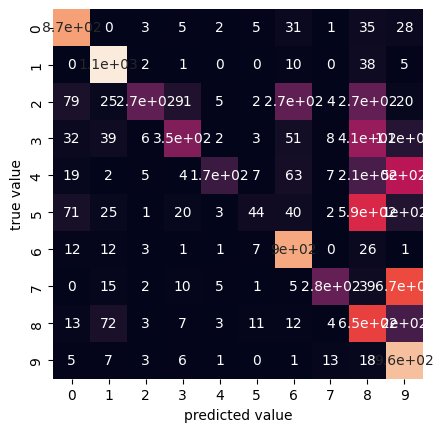

In [43]:
# Printing confusion matrix.

mat = confusion_matrix(test_labels, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

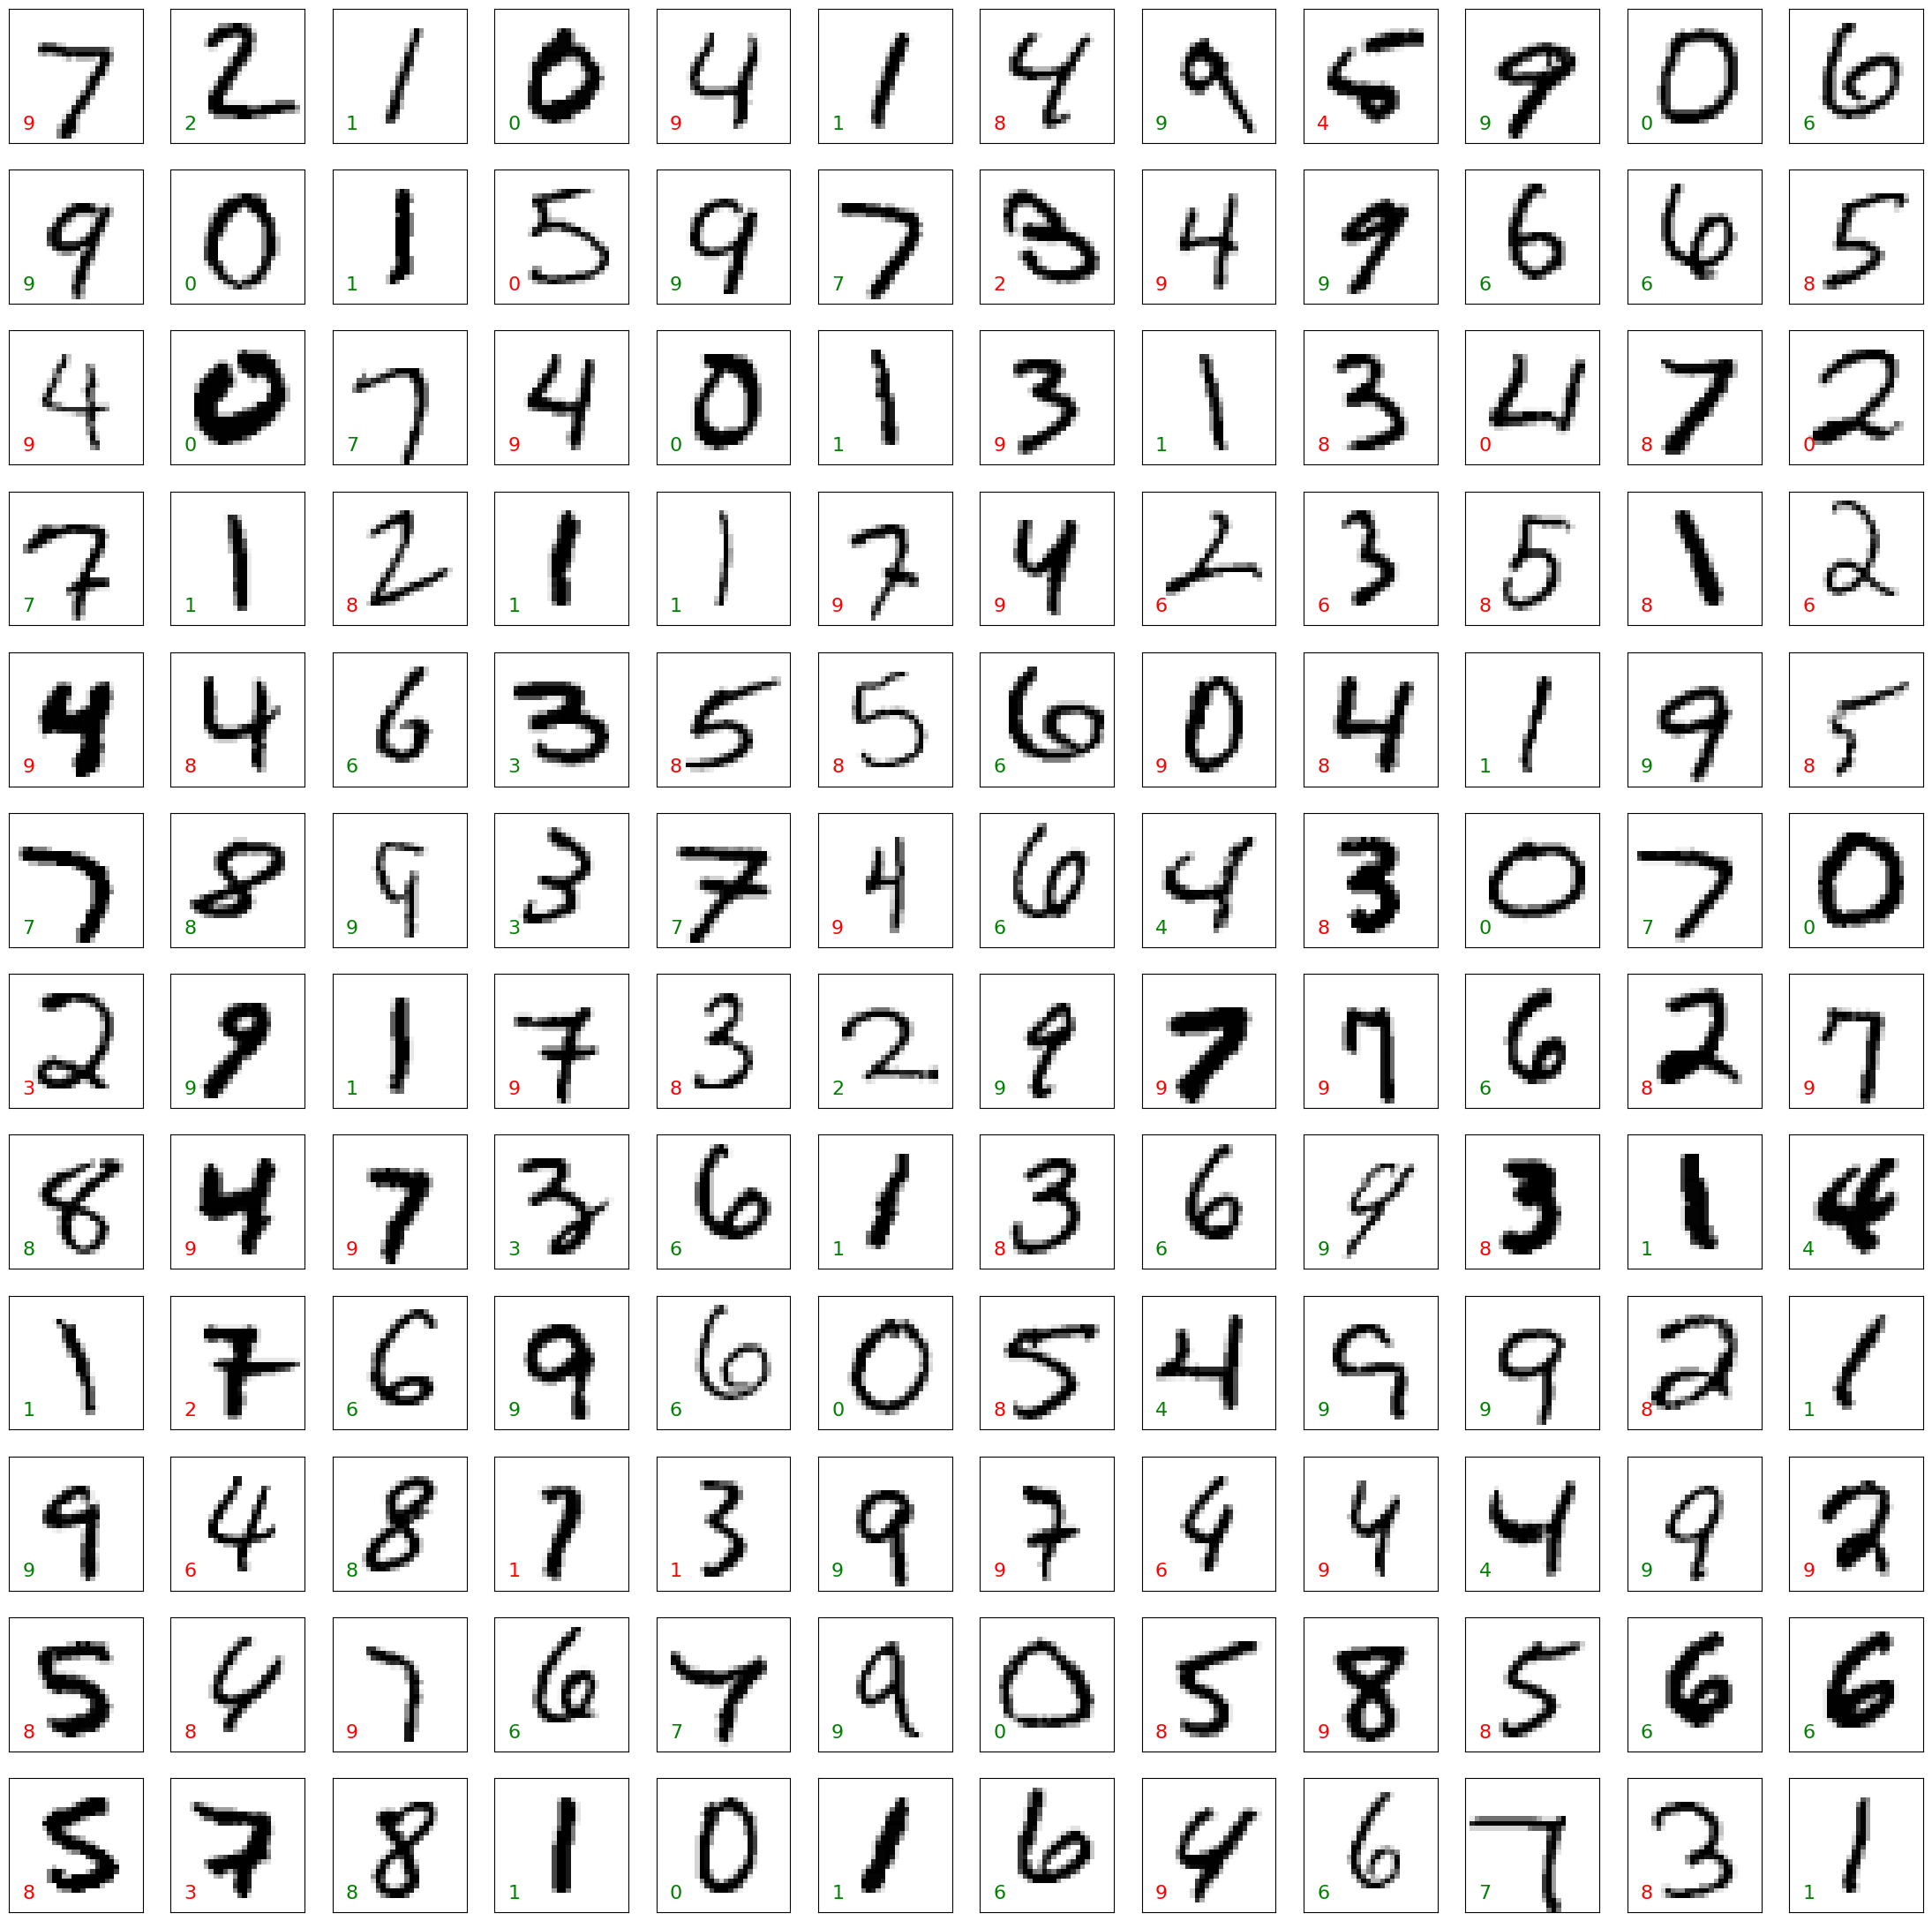

In [52]:
# Trying to print the images - rightly predicted (as green) and wrong ones (as red)

fig, axes = plt.subplots(12, 12, figsize=(28, 28),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.2, wspace=0.2))

test_images = test_images_f.reshape(-1, 28, 28)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.1, 0.1, str(y_model[i]),
            transform=ax.transAxes, fontsize=16,
            color='green' if (test_labels[i] == y_model[i]) else 'red')

--------------------------------------------------------------------

# **(2b) LOGISTIC REGRESSION:**

In [54]:
# Initializing Logistic  Regression

logreg = LogisticRegression()

In [55]:
# Fitting the training images and labels to logistic regression

logreg.fit(train_images_f, train_labels)
y_pred_log = logreg.predict(test_images_f)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
# Comparing the accuracy of the test labels and predicted values from the model.

accuracy_score(test_labels, y_pred_log)

0.9258

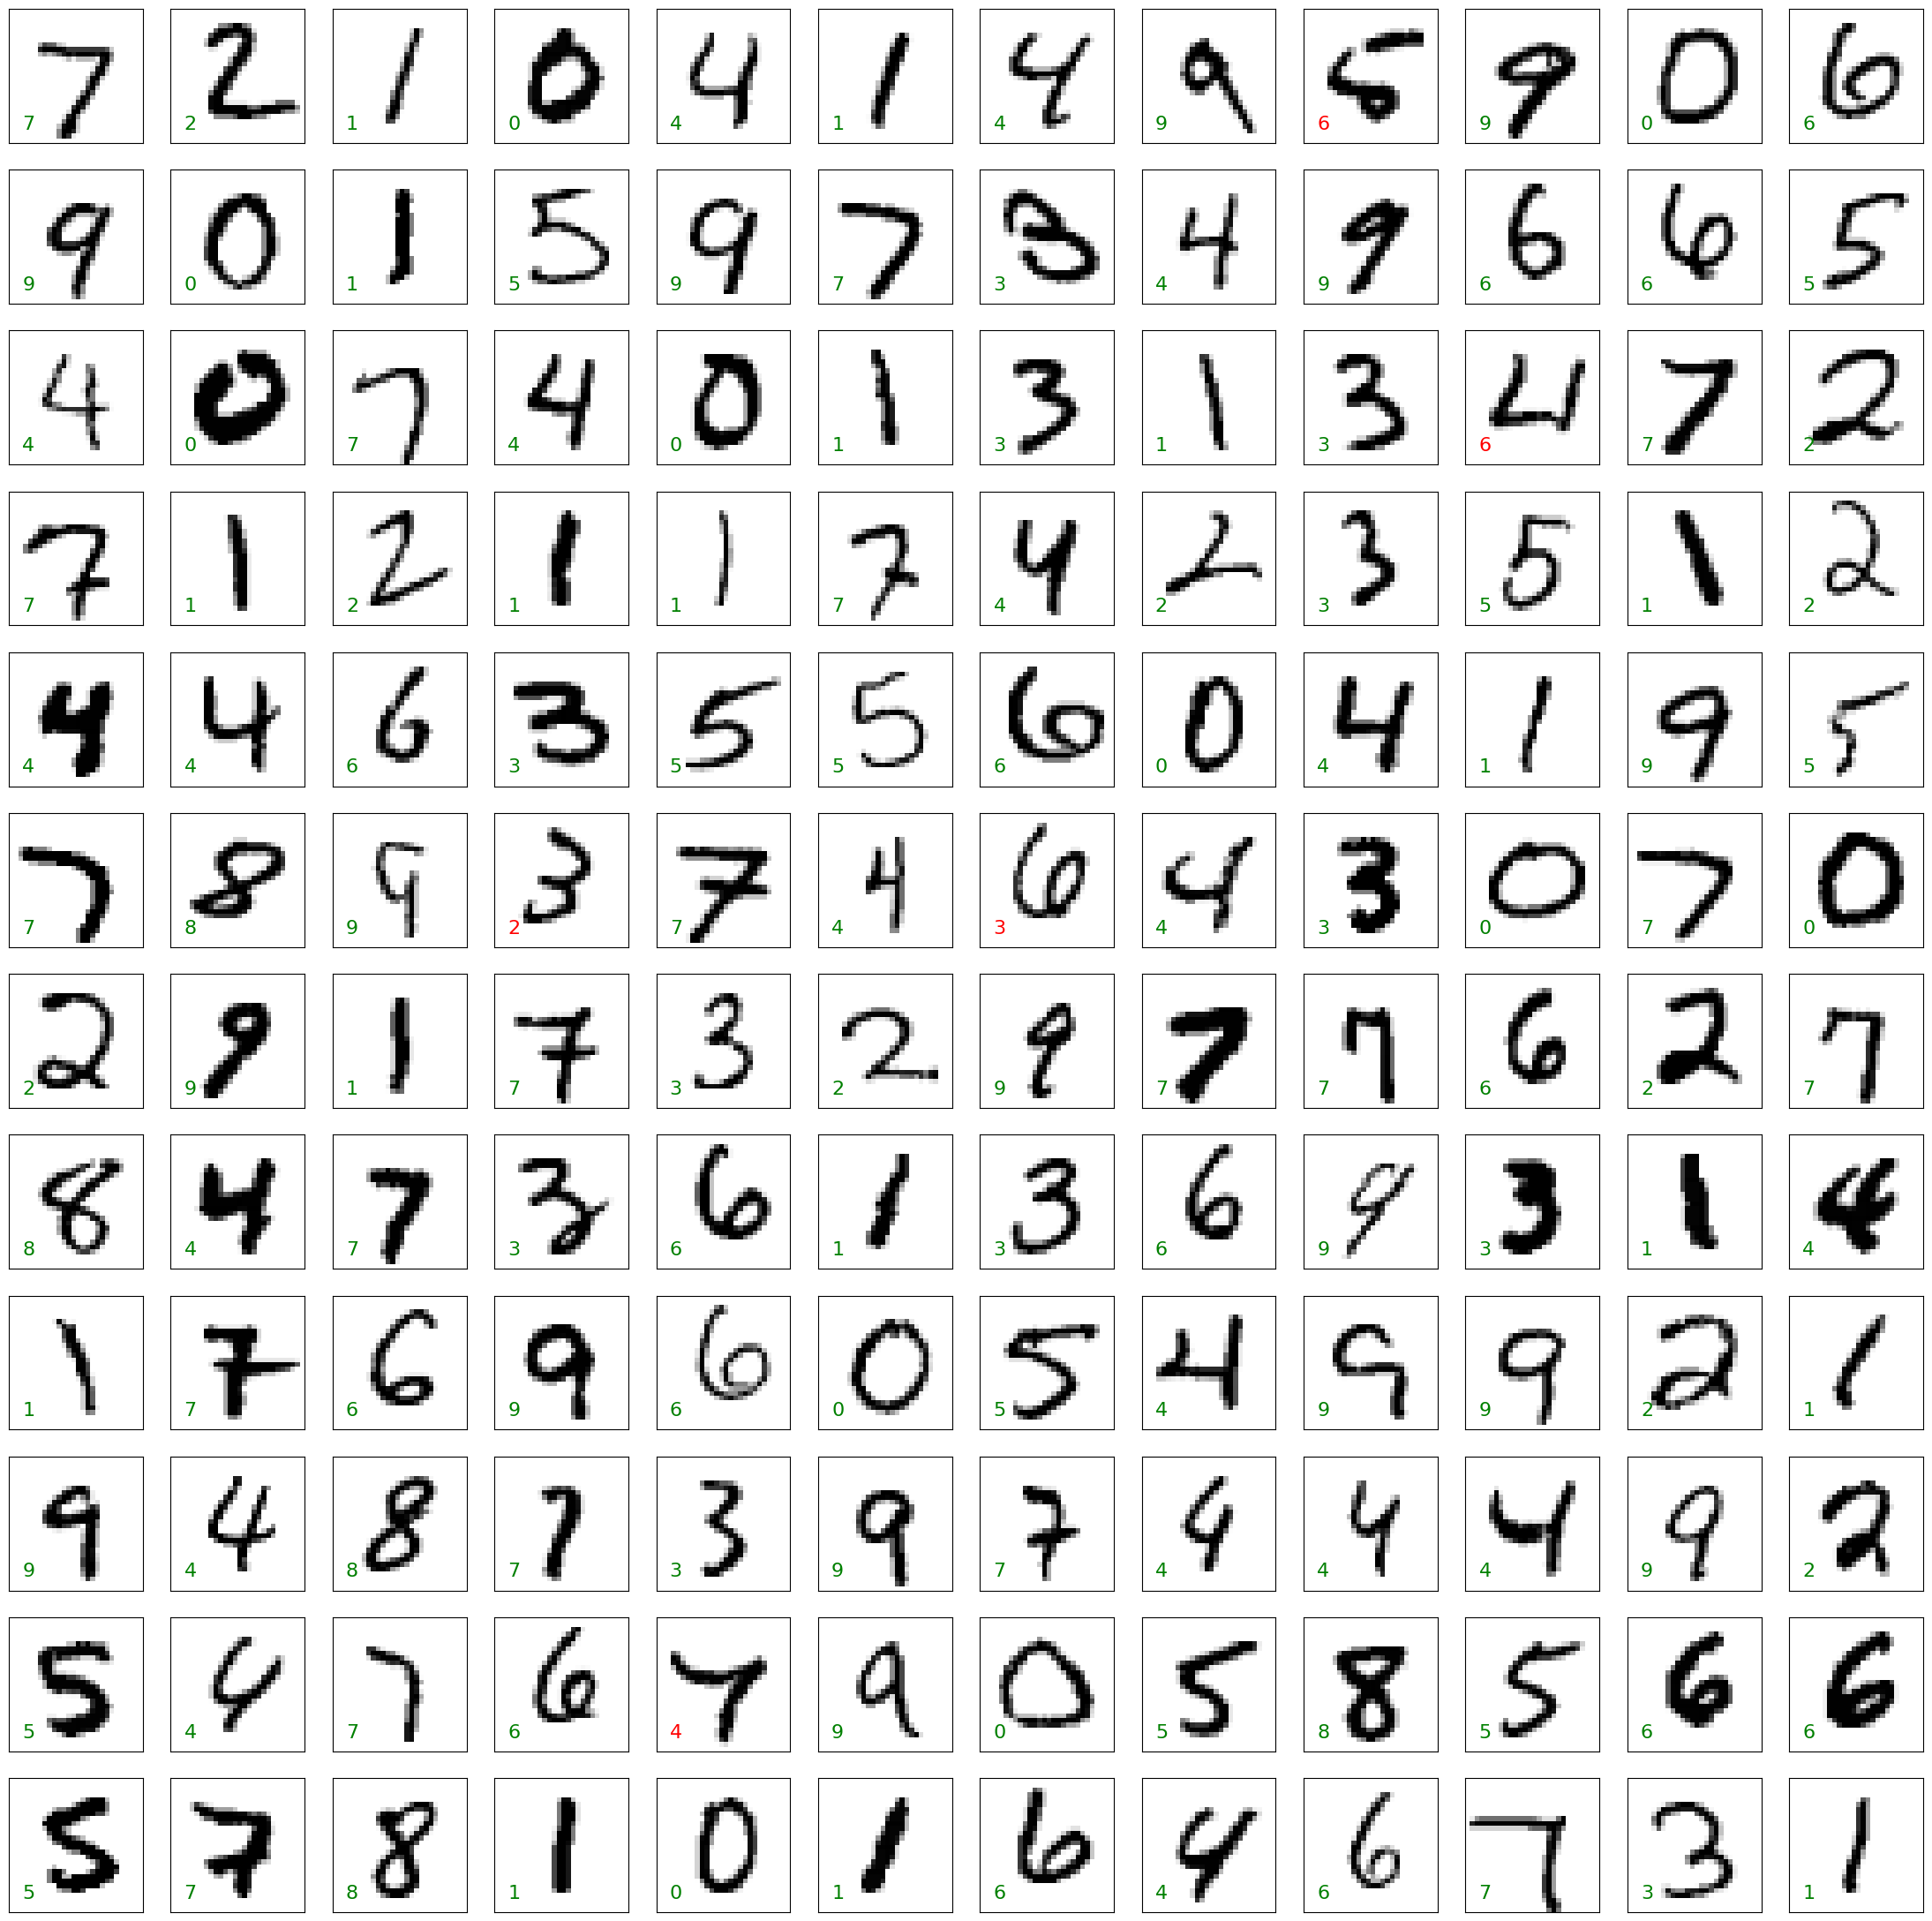

In [58]:
# Trying to print the images - rightly predicted (as green) and wrong ones (as red)

fig, axes = plt.subplots(12, 12, figsize=(28, 28),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.2, wspace=0.2))

test_images = test_images_f.reshape(-1, 28, 28)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.1, 0.1, str(y_pred_log[i]),
            transform=ax.transAxes, fontsize=16,
            color='green' if (test_labels[i] == y_pred_log[i]) else 'red')

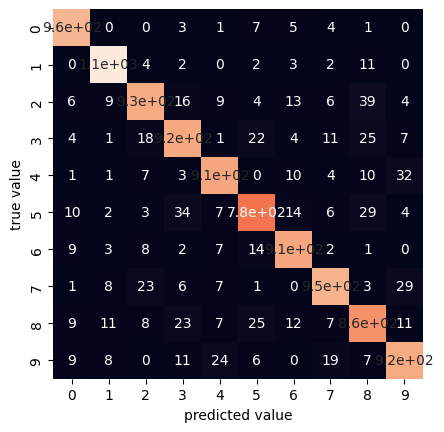

In [59]:
# Printing confusion matrix.

mat = confusion_matrix(test_labels, y_pred_log)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [61]:
y_pred_probs = logreg.predict_proba(test_images_f)[:, 1]
print(y_pred_probs[0])

7.422696642490145e-13


# **(2c) FULLY CONNECTED NEURAL NETWORK:**

In [13]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [14]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [15]:
model.fit(train_images_f, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2648 - accuracy: 0.9230
Epoch 2/5
469/469 [==============================] - 6s 12ms/step - loss: 0.1058 - accuracy: 0.9691
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0704 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0503 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 5s 12ms/step - loss: 0.0381 - accuracy: 0.9887


In [16]:
predictions = model.predict(test_images_f)

313/313 [==============================] - 2s 4ms/step


In [20]:
predictions[2].argmax()

1

In [21]:
test_labels[2]

1

In [23]:
test_loss, test_acc = model.evaluate(test_images_f, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 4s 11ms/step - loss: 0.0622 - accuracy: 0.9809
test_acc: 0.98089998960495


In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


# **(2d) Convolutional Neural Network (CNN):**

In [87]:
#Loading the data from MNIST again :)

(X_train,y_train) , (X_test,y_test)=mnist.load_data()
print("Originial shape of X_train:",X_train.shape)

Originial shape of X_train: (60000, 28, 28)


In [88]:
print(X_train.shape[0], X_train.shape[1], X_train.shape[2])
print(X_test.shape[0], X_test.shape[1], X_test.shape[2])

60000 28 28
10000 28 28


In [89]:
#Reshaping the data to fit the model using above indices
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1)) 

# Alternative method:
X_train = X_train.reshape((60000, 28 * 28)).astype("float32") / 255
X_test = X_test.reshape((10000, 28 * 28)).astype("float32") / 255

print("New Shape of Xtrain:",X_train.shape)
print("New Shape of Xtest:",X_test.shape)

New Shape of Xtrain: (60000, 784)
New Shape of Xtest: (10000, 784)


In [90]:
# Normalizing the data again to bytes (255)
X_train=X_train/255
X_test=X_test/255

In [91]:
# Defining the models and layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense


In [57]:
# Instantiating the Sequential Model
model=Sequential()

In [58]:
# Add a convolutional layer with 32 filters of size 3x3
model.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(28,28,1)))


In [59]:
# Adding Max pool of 2 x 2
model.add(MaxPool2D(2,2))

In [60]:
#Flattening the layer
model.add(Flatten())

In [61]:
# Adding Dense layer with relu activation
model.add(Dense(20,activation='relu'))


In [62]:
#Adding another Dense layer with softmax activation
model.add(Dense(10,activation='softmax'))

In [63]:
#Compiling the model:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [64]:
# Finding the Model Summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_7 (Dense)             (None, 20)                108180    
                                                                 
 dense_8 (Dense)             (None, 10)                210       
                                                                 
Total params: 108,710
Trainable params: 108,710
Non-trainable params: 0
________________________________________________

In [66]:
#fitting the model with 5 epochs
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2171 - accuracy: 0.9350
Epoch 2/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0781 - accuracy: 0.9768
Epoch 3/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0569 - accuracy: 0.9833
Epoch 4/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0444 - accuracy: 0.9871
Epoch 5/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0364 - accuracy: 0.9885


In [68]:
# Evaluating the model:
model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 6ms/step - loss: 0.0543 - accuracy: 0.9824


[0.054349903017282486, 0.9824000000953674]

**(2e) Key Differences between each model:**

- Accuracy is the fundamental difference between each model.
- Gaussian NB model has an accuracy of 0.5558, logistic regression has an accuracy of 0.9258, the neural network has an accuracy of 0.98, and finally, CNN has an accuracy of 0.98.
- Logistic regression establishes a regression equation for the relationship between train and test labels.
- On the other hand, a neural network takes those features and tries to establish the spatial relation of the features with each other. Then, each layer applies the transformation to input vectors through the weight matrix. As a result, all the layers are "densely" connected, thus causing every input to the input vector to affect the output of the output vector. 
- CNN eventually goes one step ahead, uses kernel (in our case, 3 x 3 matrix), and slides through the input vector (technical term - convolution).

## **(3) Techniques to Improve CNN Model**



**Use of CALLBACKs in the model:**

In [11]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=True,
    )
]

(X_train,y_train) , (X_test,y_test)=mnist.load_data()
print("Originial shape of X_train:",X_train.shape)
print(X_train.shape[0], X_train.shape[1], X_train.shape[2])
print(X_test.shape[0], X_test.shape[1], X_test.shape[2])

#Reshaping the data to fit the model using above indices
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1)) 

# Splitting up the data to create validation set
train_images, val_images = X_train[10000:], X_train[:10000]
train_labels, val_labels = y_train[10000:], y_train[:10000]

print("New Shape of Xtrain:",train_images.shape)
print("New Shape of Xtest:",X_test.shape)

# Normalizing the data again to bytes (255)
train_images=train_images/255
val_images=val_images/255
X_test=X_test/255

# Instantiating the Sequential Model
model=Sequential()

# Add a convolutional layer with 32 filters of size 3x3
model.add(Conv2D(filters=32,kernel_size=3, activation='relu',input_shape=(28,28,1)))

# Adding Max pool of 2 x 2
model.add(MaxPool2D(2,2))

#Flattening the layer
model.add(Flatten())

# Adding Dense layer with relu activation
model.add(Dense(100,kernel_regularizer=regularizers.l2(0.002), activation='relu'))



#Adding another Dense layer with softmax activation
model.add(Dense(10,activation='softmax'))

#Compiling the model:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#fitting the model with 5 epochs
#model.fit(X_train,y_train,epochs=10)

model.fit(train_images, train_labels,
          epochs=20,
          callbacks=callbacks_list, validation_data=(val_images, val_labels))

# Evaluating the model:
model.evaluate(X_test,y_test)

Originial shape of X_train: (60000, 28, 28)
60000 28 28
10000 28 28
New Shape of Xtrain: (50000, 28, 28, 1)
New Shape of Xtest: (10000, 28, 28, 1)
Epoch 1/20
1563/1563 [==============================] - 38s 24ms/step - loss: 0.3623 - accuracy: 0.9314 - val_loss: 0.2440 - val_accuracy: 0.9595
Epoch 2/20
1563/1563 [==============================] - 37s 24ms/step - loss: 0.2251 - accuracy: 0.9634 - val_loss: 0.2242 - val_accuracy: 0.9591
Epoch 3/20
1563/1563 [==============================] - 36s 23ms/step - loss: 0.1984 - accuracy: 0.9672 - val_loss: 0.2089 - val_accuracy: 0.9626
Epoch 4/20
1563/1563 [==============================] - 36s 23ms/step - loss: 0.1816 - accuracy: 0.9715 - val_loss: 0.1818 - val_accuracy: 0.9703
Epoch 5/20
1563/1563 [==============================] - 35s 22ms/step - loss: 0.1702 - accuracy: 0.9724 - val_loss: 0.1666 - val_accuracy: 0.9743
Epoch 6/20
1563/1563 [==============================] - 37s 24ms/step - loss: 0.1555 - accuracy: 0.9762 - val_loss: 0.1846 

[0.14711424708366394, 0.977400004863739]

**Use of Batch Normalization:**

In [18]:
(X_train,y_train) , (X_test,y_test)=mnist.load_data()
print("Originial shape of X_train:",X_train.shape)
print(X_train.shape[0], X_train.shape[1], X_train.shape[2])
print(X_test.shape[0], X_test.shape[1], X_test.shape[2])

#Reshaping the data to fit the model using above indices
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1)) 

print("New Shape of Xtrain:",X_train.shape)
print("New Shape of Xtest:",X_test.shape)

# Normalizing the data again to bytes (255)
X_train=X_train/255
X_test=X_test/255

# Defining the models and layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense


# Instantiating the Sequential Model
model=Sequential()

# Add a convolutional layer with 32 filters of size 3x3
model.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(28,28,1)))


# Adding Max pool of 2 x 2
model.add(MaxPool2D(2,2))

#Flattening the layer
model.add(Flatten())

# Adding Dense layer with relu activation
model.add(Dense(50,activation='relu'))

model.add(BatchNormalization())

#Adding another Dense layer with softmax activation
model.add(Dense(10,activation='softmax'))

#Compiling the model:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#fitting the model with 5 epochs
model.fit(X_train,y_train,epochs=10)

# Evaluating the model:
model.evaluate(X_test,y_test)


Originial shape of X_train: (60000, 28, 28)
60000 28 28
10000 28 28
New Shape of Xtrain: (60000, 28, 28, 1)
New Shape of Xtest: (10000, 28, 28, 1)
Epoch 1/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1303 - accuracy: 0.9637
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0551 - accuracy: 0.9832
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0363 - accuracy: 0.9886
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0257 - accuracy: 0.9919
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0210 - accuracy: 0.9934
Epoch 6/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.0162 - accuracy: 0.9948
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0133 - accuracy: 0.9953
Epoch 8/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0110 - accuracy: 0.9965
Epoch 9/10
1875/1875 

[0.05289412662386894, 0.9869999885559082]

In [19]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_9 (Flatten)         (None, 5408)              0         
                                                                 
 dense_20 (Dense)            (None, 50)                270450    
                                                                 
 batch_normalization_1 (Batc  (None, 50)               200       
 hNormalization)                                                 
                                                                 
 dense_21 (Dense)            (None, 10)              

## **(4) Result and Analysis:**

**Callbacks**: Usually, as we increase the epochs of the model, the accuracy goes on increasing, but so does the loss, which is classic over-fitting. Determining when to stop the model before it starts over-fitting is difficult. 

**Early-Stopping** helps us to stop the model before overfitting by following steps:
- We divide the data into train and test datasets.
- We further divide the training dataset into validation and train datasets.
- We use the validation dataset to validate our train dataset before we apply the same to the test dataset.
Early checkpointing arbitrarily sets high epochs but stops the model once the validation dataset achieves the desired accuracy.

**Model checkpointing** saves the model at some point for later use. For example, in conjunction with early stopping, we stopped the model before it overfitted and saved it as a model which can be later applied to different data.

 Callbacks help implement the early-stopping and model checkpointing by allowing it to be executed at a certain point of model-fitting.

The example below shows that the model stops at the seventh epoch when it determines that accuracy is good enough and overfitting will occur from further epochs. In our example, the model will stop once the accuracy > validation-accuracy.

**Batch Normalization**: Batch normalization normalizes the data between each layer to make learning faster. From our 2nd example, we can see that the batch-normalized model has achieved an accuracy of 86.3% right in the first epoch.

## **(5) Conclusion:**

From the assignment, we can see that all models achieved an accuracy of 95% and above for the simplest of the data images. The use of batch normalization and early stopping are tools available with modern-day machine learning to stop overfitting and achieve learning at a faster rate. In addition, model checkpointing helps us to use our machine learning model to be saved and used again in different independent datasets. 

One of this course's most important lessons is that the machine learning model must be generalized for use on any kind and shape of the dataset. Challenging multiclass and multi-label datasets can be taken care of effectively if we understand the importance of the following:
- Dense layers,
- usage of activation layers,
- kernel sizes,
- Use of early stopping,
- Max(or average)-the pooling of the features between the layers,
- Flattening between neural network layers.


Machine learning will be one of the pivotal tools as we enter the world of self-driving cars. In addition, the medical industry is already making astronomical breakthroughs by using machine learning to diagnose X-rays and MRI scans. 

As the computing power (vCPUs and RAM) becomes cheaper and cheaper, the machine learning models will get better and stronger. 